# Comparing calculated S6/ST to measured (Muth and Wallace, 2021)
- This notebook compares measured S6/ST values to those measured using XANES for Jugo, Nash and Oneill-Mavrogenes 2022
- If you are interested in how I merged different bits of the supporting information, see the notebook Merge_Muth_Supplement in Github. Else, you can just get the merged file from GitHub here to follow along:
- https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/S6St_Testing/Muth_data_Merged.xlsx

In [1]:
#!pip install PySulfSat --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None
ss.__version__

'0.0.16'

## Load data (measured MI comps)

In [2]:
df_out=ss.import_data('Muth_data_Merged.xlsx', sheet_name='Sheet1')

df_out_trim=df_out.iloc[:, 0:12]
df_out_trim['Sample_ID_Liq']=df_out['MI_Name']
df_out_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32
1,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33
2,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34
3,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43
4,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44


In [3]:
df_err=ss.import_data_noise('Muth_data_Merged.xlsx', sheet_name='Sheet1')
df_err_trim=df_err.iloc[:, 0:12]
df_err_trim['Sample_ID_Liq']=df_err['MI_Name']
df_err_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,Sample_ID_Liq
0,0.678665,0.096405,0.404524,0.303896,0.019579,0.520599,0.047518,0.264134,0.030958,0.023520,0.112563,0.018260,BBL-5-32
1,0.825791,0.026556,0.115552,0.420127,0.007783,0.152587,0.172061,0.212874,0.096533,0.030083,0.113527,0.014959,BBL-5-33
2,1.876183,0.018804,0.083276,0.194047,0.018462,0.149600,0.136053,0.187045,0.020508,0.010884,0.025529,0.017848,BBL-5-34
3,0.314276,0.036322,0.313526,0.424967,0.004634,0.043281,0.065173,0.272982,0.036137,0.017175,0.001549,0.009052,BBL-5-43
4,0.386098,0.036339,0.161871,0.387210,0.001353,0.057336,0.127017,0.097441,0.003957,0.005722,0.079326,0.010618,BBL-5-44


## Lets convert with Berry et al. (2018) following O'Neill and Mavrogenes (2022)
[Fe3+/ΣFe]Berry = ([Fe3+/ΣFe]Zhang - 0.048] / (1-0.048)

In [4]:
df_out_trim['Fe3Fet_Berry']=(df_out_trim['Fe3Fet_Liq']-0.048)/(1-0.048)
df_err_trim['Fe3Fet_Berry_Err']=df_err_trim['Fe3Fet_Liq_Err']
df_out_trim['Fe3Fet_Berry'].head()

0    0.116273
1    0.174062
2    0.140683
3    0.132187
4    0.098964
Name: Fe3Fet_Berry, dtype: float64

In [5]:
df_out_trim['Fe3Fet_Liq'].head()

0    0.158692
1    0.213707
2    0.181930
3    0.173842
4    0.142214
Name: Fe3Fet_Liq, dtype: float64

## Lets calculate a temperature 
- Using their H2O contents. 

In [6]:
import Thermobar as pt
Temp_3=pt.calculate_liq_only_temp(liq_comps=df_out, equationT='T_Put2008_eq22_BeattDMg', P=3, H2O_Liq=df_out['H2O_Liq'])
Temp_3.head()

0    1407.340081
1    1427.006146
2    1426.318219
3    1459.082125
4    1440.880509
dtype: float64

## Lets perform calcs straight up first

In [7]:
calc_GivenFe3_Rep=ss.calculate_OM2022_S6St(df=df_out_trim, T_K=Temp_3,
                    Fe3Fet_Liq=df_out_trim['Fe3Fet_Liq'])

calc_GivenFe3_Rep.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.213088,-3.316331,14.165511,-19.356183,-1.306411,0.938474,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32,0.116273,0.546628,0.089540,0.001584,0.084517,0.115094,0.108101,0.038423,0.004335,0.010465,0.001312,0.474433,0.077714,0.001375,0.073355,0.099894,0.187648,0.066697,0.007525,0.009083,0.002277,0.514420,0.557370,-8.282959,0.061714
1,0.856566,-3.054445,13.864131,-18.817435,1.787057,1.604158,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33,0.174062,0.539109,0.098521,0.001594,0.088074,0.108143,0.108113,0.039284,0.005006,0.010618,0.001539,0.467189,0.085377,0.001381,0.076324,0.093716,0.187380,0.068087,0.008677,0.009202,0.002668,0.527985,0.587220,-7.371922,0.060013
2,0.551477,-3.163752,13.828337,-18.836028,0.206641,1.249443,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34,0.140683,0.552219,0.100671,0.001422,0.081738,0.118496,0.097125,0.035123,0.003206,0.009032,0.000968,0.485928,0.088586,0.001251,0.071925,0.104271,0.170931,0.061814,0.005642,0.007948,0.001704,0.551889,0.600875,-7.735105,0.058840
3,0.555898,-2.805222,13.380534,-17.970140,0.224530,1.221990,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43,0.132187,0.535713,0.114638,0.001710,0.085773,0.101928,0.106052,0.037313,0.005459,0.010133,0.001281,0.465794,0.099676,0.001487,0.074579,0.088625,0.184422,0.064886,0.009493,0.008810,0.002228,0.572004,0.617985,-7.368103,0.061614
4,0.162507,-3.215526,13.566557,-18.446271,-1.639692,0.801218,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44,0.098964,0.523668,0.116897,0.001314,0.071580,0.127555,0.119522,0.029052,0.001917,0.007969,0.000524,0.454962,0.101560,0.001142,0.062189,0.110820,0.207680,0.050482,0.003332,0.006924,0.000910,0.620210,0.655621,-8.005795,0.053345


In [8]:
calc_GivenFe3_Berry=ss.calculate_OM2022_S6St(df=df_out_trim, T_K=Temp_3,
                    Fe3Fet_Liq=df_out_trim['Fe3Fet_Berry'])

calc_GivenFe3_Berry.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.015495,-3.316331,14.201996,-19.356183,-4.151629,0.312720,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32,0.116273,0.546628,0.089540,0.001584,0.084517,0.115094,0.108101,0.038423,0.004335,0.010465,0.001312,0.474433,0.077714,0.001375,0.073355,0.099894,0.187648,0.066697,0.007525,0.009083,0.002277,0.514420,0.557370,-8.908713,0.064825
1,0.446942,-3.054445,13.899122,-18.817435,-0.213034,1.162246,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33,0.174062,0.539109,0.098521,0.001594,0.088074,0.108143,0.108113,0.039284,0.005006,0.010618,0.001539,0.467189,0.085377,0.001381,0.076324,0.093716,0.187380,0.068087,0.008677,0.009202,0.002668,0.527985,0.587220,-7.813834,0.063039
2,0.098903,-3.163752,13.862660,-18.836028,-2.209475,0.717337,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34,0.140683,0.552219,0.100671,0.001422,0.081738,0.118496,0.097125,0.035123,0.003206,0.009032,0.000968,0.485928,0.088586,0.001251,0.071925,0.104271,0.170931,0.061814,0.005642,0.007948,0.001704,0.551889,0.600875,-8.267211,0.061807
3,0.089050,-2.805222,13.415669,-17.970140,-2.325286,0.660675,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43,0.132187,0.535713,0.114638,0.001710,0.085773,0.101928,0.106052,0.037313,0.005459,0.010133,0.001281,0.465794,0.099676,0.001487,0.074579,0.088625,0.184422,0.064886,0.009493,0.008810,0.002228,0.572004,0.617985,-7.929417,0.064720
4,0.007370,-3.215526,13.597361,-18.446271,-4.903005,0.085910,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44,0.098964,0.523668,0.116897,0.001314,0.071580,0.127555,0.119522,0.029052,0.001917,0.007969,0.000524,0.454962,0.101560,0.001142,0.062189,0.110820,0.207680,0.050482,0.003332,0.006924,0.000910,0.620210,0.655621,-8.721103,0.056034


Text(0, 0.5, 'Calc S6/St')

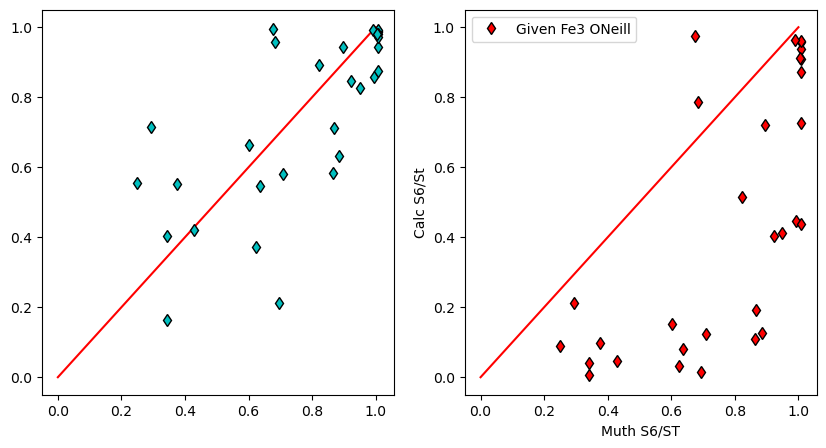

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([0, 1], [0, 1], '-r')
ax2.plot([0, 1], [0, 1], '-r')

ax1.plot(df_out['S6+/∑S'],
         calc_GivenFe3_Rep['S6St_Liq'],
         'dk', mfc='c', label='Given Fe3 ONeill')

ax2.plot(df_out['S6+/∑S'],
         calc_GivenFe3_Berry['S6St_Liq'],
         'dk', mfc='r', label='Given Fe3 ONeill')


plt.legend()
plt.xlabel('Muth S6/ST')
plt.ylabel('Calc S6/St')

In [10]:
pt.calculate_R2(df_out['S6+/∑S'],
         calc_GivenFe3_Berry['S6St_Liq'], xy=False)

{'R2': '0.46',
 'RMSE': '0.42',
 'RMSE_num': 0.42,
 'P_val': '0.000',
 'Median': '-0.30',
 'Mean': '-0.32',
 'Int': array([-0.31040758]),
 'Grad': array([0.98574948])}

In [11]:
pt.calculate_R2(df_out['S6+/∑S'],
         calc_GivenFe3_Rep['S6St_Liq'], xy=False)

{'R2': '0.51',
 'RMSE': '0.19',
 'RMSE_num': 0.19,
 'P_val': '0.000',
 'Median': '-0.03',
 'Mean': '-0.03',
 'Int': array([0.2016873]),
 'Grad': array([0.70240837])}

## Now lets account for error

In [12]:
N_dups=5000
# Lets set temp error at +-50 K
df_out_trim['T_K_Liq']=Temp_3
df_err_trim['T_K_Liq_Err']=50

df_noisy_abs=ss.add_noise_2_dataframes(df_values=df_out_trim, df_err=df_err_trim, 
        error_type="Abs", error_dist="normal", N_dups=N_dups, sample_name_col='Sample_ID_Liq')
df_noisy_abs.head()

Yay. columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Fe3Fet_Berry,T_K_Liq,Sample_ID_Liq
0,49.797576,1.211693,16.774950,9.260128,0.186642,5.495229,9.814020,3.686214,0.614460,0.277026,1.169258,0.167303,0.122083,1421.543553,BBL-5-32
1,50.494926,1.272676,16.622276,9.599924,0.194012,5.089669,9.824687,3.985596,0.645257,0.232295,1.207898,0.160363,0.110349,1351.571247,BBL-5-32
2,49.089239,1.319184,17.455822,9.217852,0.163051,6.017537,9.813794,3.476428,0.652678,0.277279,1.227235,0.163189,0.087899,1450.469202,BBL-5-32
3,48.760745,1.436140,16.573107,9.066751,0.168713,5.448916,9.800412,3.776114,0.583994,0.294142,1.355920,0.141446,0.098840,1317.685283,BBL-5-32
4,49.041580,1.335329,16.524940,9.454756,0.205234,5.258244,9.856667,3.125986,0.672938,0.307970,1.357590,0.145162,0.107768,1407.770668,BBL-5-32


## Now put all this synthetic simulated data into the S6 calculation

In [13]:
noisy_ONeill_Fe_S6St_Rep=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Liq'],
                                          T_K=df_noisy_abs['T_K_Liq'])
noisy_ONeill_Fe_S6St_Rep.head()

noisy_ONeill_Fe_S6St_Berry=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Berry'],
                                      T_K=df_noisy_abs['T_K_Liq'])
noisy_ONeill_Fe_S6St_Berry.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Fe3Fet_Berry,T_K_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.025206,-3.167291,14.015622,-18.965574,-3.655149,0.400300,49.797576,1.211693,16.774950,9.260128,0.186642,5.495229,9.814020,3.686214,0.614460,0.277026,1.169258,0.167303,0.122083,1421.543553,BBL-5-32,0.545508,0.089740,0.001732,0.084833,0.115190,0.108288,0.039146,0.004294,0.009984,0.001285,0.473116,0.077831,0.001502,0.073575,0.099903,0.187835,0.067903,0.007448,0.008659,0.002228,0.514046,0.559537,-8.643250,0.064593
1,0.006143,-3.791354,15.245431,-20.969961,-5.086349,0.164200,50.494926,1.272676,16.622276,9.599924,0.194012,5.089669,9.824687,3.985596,0.645257,0.232295,1.207898,0.160363,0.110349,1351.571247,BBL-5-32,0.549288,0.082537,0.001788,0.087333,0.114510,0.106554,0.042030,0.004477,0.010414,0.001070,0.475932,0.071515,0.001549,0.075669,0.099218,0.184648,0.072835,0.007759,0.009023,0.001854,0.485877,0.529536,-9.791841,0.067319
2,0.001862,-2.914055,13.578239,-18.193941,-6.284213,-0.204560,49.089239,1.319184,17.455822,9.217852,0.163051,6.017537,9.813794,3.476428,0.652678,0.277279,1.227235,0.163189,0.087899,1450.469202,BBL-5-32,0.535882,0.097929,0.001508,0.084153,0.114787,0.112292,0.036790,0.004545,0.010832,0.001281,0.464004,0.084794,0.001305,0.072865,0.099391,0.194461,0.063711,0.007870,0.009379,0.002219,0.537821,0.581694,-8.896620,0.066461
3,0.002143,-4.186636,15.868829,-22.017790,-6.143598,-0.037383,48.760745,1.436140,16.573107,9.066751,0.168713,5.448916,9.800412,3.776114,0.583994,0.294142,1.355920,0.141446,0.098840,1317.685283,BBL-5-32,0.541100,0.090142,0.001586,0.084142,0.116527,0.108377,0.040623,0.004134,0.011988,0.001382,0.468682,0.078078,0.001374,0.072881,0.100931,0.187745,0.070372,0.007161,0.010383,0.002394,0.517203,0.555111,-10.470157,0.065678
4,0.007404,-3.254418,14.058149,-19.344225,-4.898301,0.192414,49.041580,1.335329,16.524940,9.454756,0.205234,5.258244,9.856667,3.125986,0.672938,0.307970,1.357590,0.145162,0.107768,1407.770668,BBL-5-32,0.545789,0.087239,0.001935,0.087997,0.117534,0.108375,0.033726,0.004777,0.011178,0.001451,0.475290,0.075970,0.001685,0.076630,0.102352,0.188752,0.058739,0.008320,0.009734,0.002527,0.497829,0.536972,-9.023574,0.068372


## Now calculate the error bar for each row

In [14]:
Stats_Fe_S6_Rep=pt.av_noise_samples_series(calc=noisy_ONeill_Fe_S6St_Rep['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_Fe_S6_Rep.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.248192,0.207046,0.175095,0.920127,0.003584
1,BBL-5-33,5000,0.820106,0.852587,0.126081,0.991805,0.093313
2,BBL-5-34,5000,0.534991,0.545072,0.210209,0.982827,0.016707
3,BBL-5-43,5000,0.541219,0.556371,0.214526,0.976275,0.011290
4,BBL-5-44,5000,0.207277,0.162936,0.166297,0.959289,0.000676


In [15]:
Stats_Fe_S6_Berry=pt.av_noise_samples_series(calc=noisy_ONeill_Fe_S6St_Berry['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_Fe_S6_Berry.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.031569,0.014859,0.046860,0.445514,1.240172e-05
1,BBL-5-33,5000,0.447704,0.442814,0.210738,0.950361,6.171758e-03
2,BBL-5-34,5000,0.140324,0.097373,0.131912,0.802043,5.487824e-04
3,BBL-5-43,5000,0.133452,0.089571,0.131248,0.918605,3.974843e-04
4,BBL-5-44,5000,0.018004,0.006995,0.032269,0.525684,1.103602e-08


## Lets do the same using Nash
- If you just want to vary 1 thing, you can do it this way
- First, take your dataframe, and duplicate it N times, all the columns will be the same, but will now be Sample1-Sample1-Sample1, Sample2-Sample2-Sample2

In [16]:
Dupdf=ss.duplicate_dataframe(df=df_out_trim, N_dup=N_dups)
Dupdf.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,Fe3Fet_Berry,T_K_Liq
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
1,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
2,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
3,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081
4,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,0.116273,1407.340081


### Now you can make the errors for one column at a time if you prefer

- E.g. adding a temp error of +- 1sigma = 50 K

In [17]:
Temp_Err=ss.add_noise_series(df_out_trim['T_K_Liq'], error_var=50,
error_type="Abs", error_dist="normal", N_dup=N_dups)
# Then add this to the dataframe
Dupdf['T_K_MC']=Temp_Err

- And adding a Fe3Fet_Liq error from their spreadsheet

In [18]:
Fe3_Err=ss.add_noise_series(df_out_trim['Fe3Fet_Liq'], error_var=df_err_trim['Fe3Fet_Liq_Err'],
error_type="Abs", error_dist="normal", N_dup=N_dups)
## 
Dupdf['Fe3Fet_Liq_MC']=Fe3_Err

## Now put these uncertainties into Nash

In [19]:
noisy_Nash_S6St=ss.calculate_S6St_Nash2019(Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
                                          T_K=Dupdf['T_K_MC'])
noisy_Nash_S6St.head()

0    0.179730
1    0.250812
2    0.217880
3    0.194301
4    0.035281
dtype: float64

In [20]:
Stats_Nash_S6=pt.av_noise_samples_series(calc=noisy_Nash_S6St, sampleID=Dupdf['Sample_ID_Liq'])
Stats_Nash_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.199358,0.135091,0.188737,0.939815,0.000339
1,BBL-5-33,5000,0.752825,0.812677,0.194477,0.998351,0.033844
2,BBL-5-34,5000,0.460932,0.449486,0.250713,0.990106,0.001434
3,BBL-5-43,5000,0.480700,0.477446,0.254393,0.984924,0.001917
4,BBL-5-44,5000,0.153951,0.092384,0.164570,0.919778,0.000171


## And Jugo
- First, need to calculate QFM relative to frost from the Fe3Fet ratio

In [21]:
Buffer=pt.convert_fe_partition_to_fo2(liq_comps=df_noisy_abs,  T_K=Dupdf['T_K_MC'], P_kbar=5,  
        model="Kress1991", Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
 renorm=False)
Buffer.head()

overwriting Fe3Fet_Liq to that specified in the function input
(150000,)


,DeltaQFM_Frost1991,DeltaNNO_Frost1991,fo2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Fe3Fet_Berry,T_K_Liq,Sample_ID_Liq,FeO_Liq,Fe2O3_Liq
0,0.189336,-0.325775,2.329901e-09,49.797576,1.211693,16.774950,9.260128,0.186642,5.495229,9.814020,3.686214,0.614460,0.277026,1.169258,0.166708,0.122083,1421.543553,BBL-5-32,7.716391,1.715261
1,0.065928,-0.453433,8.373566e-09,50.494926,1.272676,16.622276,9.599924,0.194012,5.089669,9.824687,3.985596,0.645257,0.232295,1.207898,0.157220,0.110349,1351.571247,BBL-5-32,8.090619,1.677004
2,0.104017,-0.415140,8.483038e-09,49.089239,1.319184,17.455822,9.217852,0.163051,6.017537,9.813794,3.476428,0.652678,0.277279,1.227235,0.154980,0.087899,1450.469202,BBL-5-32,7.789273,1.587308
3,0.084345,-0.433007,4.173689e-09,48.760745,1.436140,16.573107,9.066751,0.168713,5.448916,9.800412,3.776114,0.583994,0.294142,1.355920,0.159559,0.098840,1317.685283,BBL-5-32,7.620065,1.607427
4,-0.353537,-0.870920,1.539961e-09,49.041580,1.335329,16.524940,9.454756,0.205234,5.258244,9.856667,3.125986,0.672938,0.307970,1.357590,0.130316,0.107768,1407.770668,BBL-5-32,8.222650,1.369006


In [22]:
noisy_Jugo=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=Buffer['DeltaQFM_Frost1991'])
noisy_Jugo.head()

0    0.018642
1    0.010647
2    0.012662
3    0.011578
4    0.001557
Name: DeltaQFM_Frost1991, dtype: float64

In [23]:
Stats_Jugo_S6=pt.av_noise_samples_series(calc=noisy_Jugo, sampleID=Dupdf['Sample_ID_Liq'])
Stats_Jugo_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.024714,0.010570,0.041081,0.616398,0.000016
1,BBL-5-33,5000,0.403304,0.388401,0.221369,0.986830,0.003839
2,BBL-5-34,5000,0.090221,0.053767,0.100373,0.807811,0.000358
3,BBL-5-43,5000,0.098867,0.058677,0.111302,0.869963,0.000143
4,BBL-5-44,5000,0.012728,0.004745,0.023211,0.296184,0.000003


In [24]:
S_types=ss.convert_S_types(S_wt=df_out['S'])
S_types.head()

,S_wt,S_ppm,SO2_wt,SO2_ppm,SO3_wt,SO3_ppm,SO4_wt,SO4_ppm
0,0.133403,1334.034269,0.266528,2665.281066,0.333090,3330.904464,0.399653,3996.527863
1,0.150144,1501.439419,0.299974,2999.741572,0.374889,3748.892648,0.449804,4498.043724
2,0.124034,1240.340506,0.247809,2478.089313,0.309696,3096.963717,0.371584,3715.838121
3,0.108941,1089.410000,0.217654,2176.543672,0.272011,2720.110507,0.326368,3263.677343
4,0.093533,935.330000,0.186871,1868.705623,0.233539,2335.393434,0.280208,2802.081245


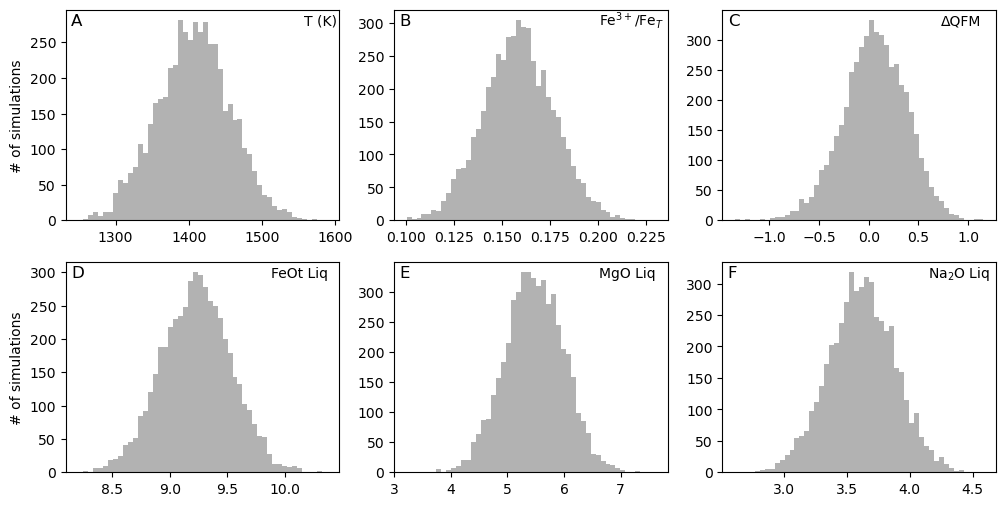

In [42]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,6))
sam='BBL-5-32'
bins=50
ax1.hist(df_noisy_abs['T_K_Liq'].loc[Dupdf['Sample_ID_Liq']==sam],  fc='black', alpha=0.3, bins=bins);
ax2.hist(df_noisy_abs['Fe3Fet_Liq'].loc[Dupdf['Sample_ID_Liq']==sam], fc='black', alpha=0.3, bins=bins);
ax3.hist(Buffer['DeltaQFM_Frost1991'].loc[Buffer['Sample_ID_Liq']==sam],  fc='black', alpha=0.3, bins=bins);
ax4.hist(df_noisy_abs['FeOt_Liq'].loc[df_noisy_abs['Sample_ID_Liq']==sam], fc='black', alpha=0.3, bins=bins);
ax5.hist(df_noisy_abs['MgO_Liq'].loc[df_noisy_abs['Sample_ID_Liq']==sam],  fc='black', alpha=0.3, bins=bins);
ax6.hist(df_noisy_abs['Na2O_Liq'].loc[df_noisy_abs['Sample_ID_Liq']==sam], fc='black', alpha=0.3, bins=bins);
ax1.set_ylabel('# of simulations')
ax4.set_ylabel('# of simulations')
ax1.annotate("T (K)", xy=(0.87, 0.93), xycoords="axes fraction", fontsize=10)
ax2.annotate("Fe$^{3+}$/Fe$_{T}$", xy=(0.75, 0.93), xycoords="axes fraction", fontsize=10)
ax3.annotate("ΔQFM", xy=(0.8, 0.93), xycoords="axes fraction", fontsize=10)
ax4.annotate("FeOt Liq", xy=(0.75, 0.93), xycoords="axes fraction", fontsize=10)
ax5.annotate("MgO Liq", xy=(0.75, 0.93), xycoords="axes fraction", fontsize=10)
ax6.annotate("Na$_2$O Liq", xy=(0.75, 0.93), xycoords="axes fraction", fontsize=10)

ax1.annotate("A", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)
ax2.annotate("B", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)
ax3.annotate("C", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)
ax4.annotate("D", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)
ax5.annotate("E", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)
ax6.annotate("F", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=12)

fig.savefig('MonteCarlo_Muth_input.png', dpi=300)

## Figure for text showing S6/St with errorbars
- Using reported

C:\Users\penny\AppData\Local\Temp\ipykernel_30876\3752010702.py:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "Transparent" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Muth_outputs_TheirFe.png', dpi=300, Transparent=True)


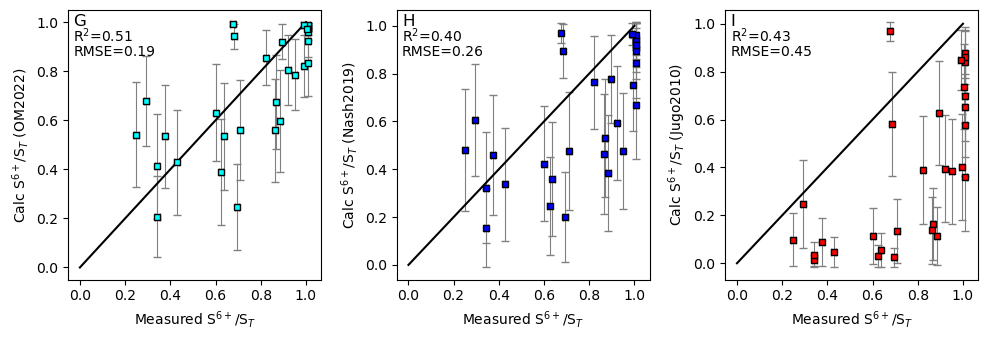

In [44]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3.5))
ms1=5




ax1.errorbar(df_out['S6+/∑S'],
         Stats_Fe_S6_Rep['Mean_calc'],
            xerr=0.01, yerr=Stats_Fe_S6_Rep['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=ms1, mec='k', capsize=3, label='usingFe')


ax2.errorbar(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Nash_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='blue', ms=ms1, mec='k', capsize=3, label='usingFe')

ax3.errorbar(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Jugo_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='red', ms=ms1, mec='k', capsize=3, label='usingFe')

# s=ax1.scatter(df_out['S6+/∑S'],
#          Stats_Fe_S6_Rep['Mean_calc'], marker='s', s=50, edgecolors='k', linewidths=0.5,
#             c=S_types['S_ppm'], cmap='hot', zorder=100)
#fig.colorbar(s, ax=ax3)

ax1.plot([0, 1], [0, 1], '-k')
ax2.plot([0, 1], [0, 1], '-k')
ax3.plot([0, 1], [0, 1], '-k')
ax1.set_xlabel('Measured S$^{6+}$/S$_T$')
ax1.set_ylabel('Calc S$^{6+}$/S$_T$ (OM2022)')
ax2.set_xlabel('Measured S$^{6+}$/S$_T$')
ax2.set_ylabel('Calc S$^{6+}$/S$_T$ (Nash2019)')
ax3.set_xlabel('Measured S$^{6+}$/S$_T$')
ax3.set_ylabel('Calc S$^{6+}$/S$_T$ (Jugo2010)')

# Print stats on fig
O22_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6_Rep['Mean_calc'], xy=False)
ax1.annotate('G', xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)

ax1.annotate('R$^{2}$='+str(O22_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax1.annotate('RMSE='+str(O22_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

Nash_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)
ax2.annotate('H', xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)

ax2.annotate('R$^{2}$='+str(Nash_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax2.annotate('RMSE='+str(Nash_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)


Jugo_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)
ax3.annotate('I', xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)
ax3.annotate('R$^{2}$='+str(Jugo_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax3.annotate('RMSE='+str(Jugo_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

fig.tight_layout()
fig.savefig('Muth_outputs_TheirFe.png', dpi=300, Transparent=True)

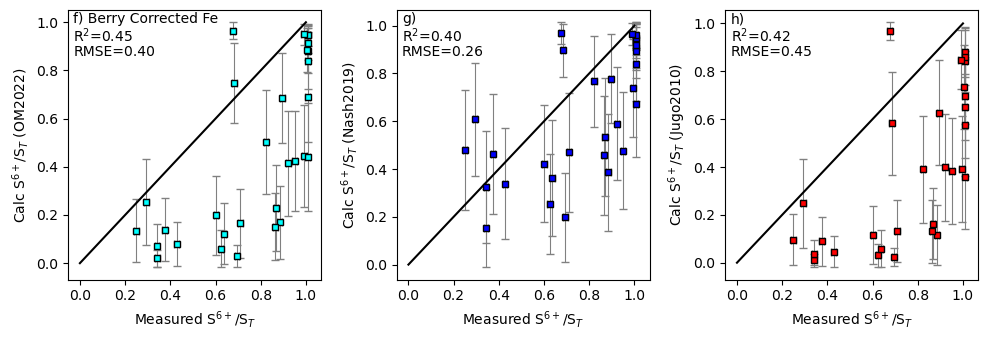

In [81]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3.5))
ms1=5




ax1.errorbar(df_out['S6+/∑S'],
         Stats_Fe_S6_Berry['Mean_calc'],
            xerr=0.01, yerr=Stats_Fe_S6_Berry['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=ms1, mec='k', capsize=3, label='usingFe')


ax2.errorbar(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Nash_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='blue', ms=ms1, mec='k', capsize=3, label='usingFe')

ax3.errorbar(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Jugo_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='red', ms=ms1, mec='k', capsize=3, label='usingFe')

# s=ax1.scatter(df_out['S6+/∑S'],
#          Stats_Fe_S6_Berry['Mean_calc'], marker='s', s=50, edgecolors='k', linewidths=0.5,
#             c=S_types['S_ppm'], cmap='hot', zorder=100)
#fig.colorbar(s, ax=ax3)

ax1.plot([0, 1], [0, 1], '-k')
ax2.plot([0, 1], [0, 1], '-k')
ax3.plot([0, 1], [0, 1], '-k')
ax1.set_xlabel('Measured S$^{6+}$/S$_T$')
ax1.set_ylabel('Calc S$^{6+}$/S$_T$ (OM2022)')
ax2.set_xlabel('Measured S$^{6+}$/S$_T$')
ax2.set_ylabel('Calc S$^{6+}$/S$_T$ (Nash2019)')
ax3.set_xlabel('Measured S$^{6+}$/S$_T$')
ax3.set_ylabel('Calc S$^{6+}$/S$_T$ (Jugo2010)')

# Print stats on fig
O22_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6_Berry['Mean_calc'], xy=False)
ax1.annotate('f) Berry Corrected Fe', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax1.annotate('R$^{2}$='+str(O22_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax1.annotate('RMSE='+str(O22_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

Nash_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)
ax2.annotate('g)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax2.annotate('R$^{2}$='+str(Nash_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax2.annotate('RMSE='+str(Nash_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)


Jugo_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)
ax3.annotate('h)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate('R$^{2}$='+str(Jugo_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax3.annotate('RMSE='+str(Jugo_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

fig.tight_layout()
fig.savefig('Muth_outputs_Berry.png', dpi=200)

## We can also do Monte Carlo simulations for the SCSS (and all other calculations)

### Lets make a monte carlo simulation for the sulfide composition, say error is +-0.05 Fe/Fe+Ni+Cu

In [36]:
df_out['FeFeNiCu']=0.634
FeFeNiCu_Err=ss.add_noise_series(df_out['FeFeNiCu'], error_var=0.05,
error_type="Abs", error_dist="normal", N_dup=N_dups)
## 
df_noisy_abs['FeFeNiCu_MC']=FeFeNiCu_Err

In [37]:
SCSS_S2017_MC=ss.calculate_S2017_SCSS(df=df_noisy_abs, T_K=df_noisy_abs['T_K_Liq'], Fe_FeNiCu_Sulf=df_noisy_abs['FeFeNiCu_MC'],
                                   P_kbar=5)
                                   

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq',
       'Fe3Fet_Berry', 'T_K_Liq', 'Sample_ID_Liq', 'FeFeNiCu_MC',
       'Fe_FeNiCu_Sulf_calc'],
      dtype='object')
no non ideal SCSS as no Cu/CuFeNiCu


### Now lets average these per sample

In [38]:
Stats_SCSS=pt.av_noise_samples_series(calc=SCSS_S2017_MC['SCSS2_ppm_ideal_Smythe2017'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_SCSS.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,626.335558,621.525430,99.324700,1032.339699,340.068586
1,BBL-5-33,5000,687.739172,681.703555,107.944147,1203.607961,347.518389
2,BBL-5-34,5000,676.204450,670.732515,106.204228,1243.864188,377.415909
3,BBL-5-43,5000,722.838765,717.432127,111.436801,1158.307583,381.411859
4,BBL-5-44,5000,719.604209,714.535012,114.102237,1233.004163,404.004343


## Lets also calculate the SCAS

In [39]:
SCAS_ZT_MC=ss.calculate_ZT2022_SCAS(df=df_noisy_abs, T_K=df_noisy_abs['T_K_Liq'],
                                   P_kbar=5)
                                   

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\scas_calc.py:133: UserWarning: you entered a P_kbar, just be aware this function isnt actually pressure sensitive
  w.warn('you entered a P_kbar, just be aware this function isnt actually pressure sensitive')


In [41]:
STot_MC=ss.calculate_S_Total_SCSS_SCAS(SCSS=SCSS_S2017_MC['SCSS2_ppm_ideal_Smythe2017'],
                    SCAS=SCAS_ZT_MC['SCAS6_ppm'], S6St_Liq=noisy_ONeill_Fe_S6St_Rep['S6St_Liq'])
STot_MC.head()                              

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,3240.188144,759.130918,2481.057226,None,0.765714,759.130918,4477.640231,3240.188144,5847.667130,2481.057226,1370.026899
1,1218.622875,672.952952,545.669923,None,0.447776,672.952952,4026.535730,1218.622875,8992.301648,545.669923,4965.765917
2,1002.025837,577.181177,424.844661,None,0.423986,577.181177,3982.480496,1002.025837,9392.958706,424.844661,5410.478210
3,649.587417,445.033971,204.553446,None,0.314897,445.033971,2804.771007,649.587417,8906.933563,204.553446,6102.162556
4,892.103536,641.120428,250.983109,None,0.281339,641.120428,5416.539576,892.103536,19252.746280,250.983109,13836.206704


### Lets average this per sample

In [42]:
Stats_St=pt.av_noise_samples_series(calc=STot_MC['Total_S_ppm'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_St.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,919.824882,801.506739,459.389253,9839.767527,341.898491
1,BBL-5-33,5000,4135.637654,4172.922171,1791.082455,12402.945358,553.779183
2,BBL-5-34,5000,1922.953340,1467.644761,1354.270876,12241.870851,454.402272
3,BBL-5-43,5000,2104.651783,1604.739972,1483.829199,11816.889118,437.380008
4,BBL-5-44,5000,987.044319,869.330608,460.623124,7716.013147,406.561013


In [43]:
Stats_S6=pt.av_noise_samples_series(calc=STot_MC['SCAS_6_ppm'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_S6.head()
Stats_S2=pt.av_noise_samples_series(calc=STot_MC['SCSS_2_ppm'], sampleID=df_noisy_abs['Sample_ID_Liq'])
Stats_S2.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,626.335558,621.525430,99.324700,1032.339699,340.068586
1,BBL-5-33,5000,687.739172,681.703555,107.944147,1203.607961,347.518389
2,BBL-5-34,5000,676.204450,670.732515,106.204228,1243.864188,377.415909
3,BBL-5-43,5000,722.838765,717.432127,111.436801,1158.307583,381.411859
4,BBL-5-44,5000,719.604209,714.535012,114.102237,1233.004163,404.004343


## Lets calculate the STot using the measured S6/ST amount

In [44]:
df_out['S6St']=df_out['S6+/∑S']
df_out.loc[df_out['S6+/∑S']>1]=1
SCSS_S2017=ss.calculate_S2017_SCSS(df=df_out, T_K=Temp_3, Fe_FeNiCu_Sulf=0.634,
                                   P_kbar=5)
                                   

SCAS_ZT=ss.calculate_ZT2022_SCAS(df=df_out, T_K=Temp_3,
                                   P_kbar=5)
                                  
STot=ss.calculate_S_Total_SCSS_SCAS(SCSS=SCSS_S2017['SCSS2_ppm_ideal_Smythe2017'],
                    SCAS=SCAS_ZT['SCAS6_ppm'], S6St_Liq=df_out['S6+/∑S'])
STot.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq',
       'Ni_Liq_ppm', 'Cu_Liq_ppm', 'Unnamed: 0.1', 'Unnamed: 0',
       'Tephra Sample', 'Unnamed: 2', 'MI_Name', 'IS6+', 'IS4+', 'IS2-',
       'S6+/∑S', '% Correction', 'Centroid (eV)', 'Centroid s.e.',
       'Fe3Fet_Liq_Err', 'log (fO2)', 'Δ QFM', 'CinderCone', 'TephraSample',
       'Inclusion', 'MinimumInclusionWidth(μm)', 'MaxmimumInclusionWidth(μm)',
       'Vaporbubble?', 'VaporbubbleDiameter*(μm)', 'OxideinMI?',
       'SulfideinMI?', 'Unnamed: 10', 'DateAnalyzedEPMA', 'Unnamed: 12',
       'SiO2_Liq_Err', 'TiO2_Liq_Err', 'Al2O3_Liq_Err', 'FeOt_Liq_Err',
       'MnO_Liq_Err', 'MgO_Liq_Err', 'CaO_Liq_Err', 'Na2O_Liq_Err',
       'K2O_Liq_Err', 'P2O5_Liq_Err', 'S', 'S_Err', 'Cl', 'Cl_Err',
       'Unnamed: 37', 'H2O_Liq_Err', 'Unnamed: 40', 'OlivineHostFo%',
       'Unnam

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\scas_calc.py:133: UserWarning: you entered a P_kbar, just be aware this function isnt actually pressure sensitive
  w.warn('you entered a P_kbar, just be aware this function isnt actually pressure sensitive')
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  n

,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,2045.786001,625.153851,1420.632150,None,0.694419,625.153851,4364.741895,2045.786001,6285.460924,1420.632150,1920.719029
1,4840.565722,30.709456,4809.856266,None,0.993656,685.060485,4809.856266,107982.384252,4840.565722,107297.323767,30.709456
2,1076.254500,673.318103,402.936397,None,0.374388,673.318103,4977.354145,1076.254500,13294.653541,402.936397,8317.299396
3,955.162067,716.391457,238.770610,None,0.249979,716.391457,5478.824513,955.162067,21917.125172,238.770610,16438.300659
4,1093.450261,719.152091,374.298170,None,0.342309,719.152091,5359.471170,1093.450261,15656.809530,374.298170,10297.338360


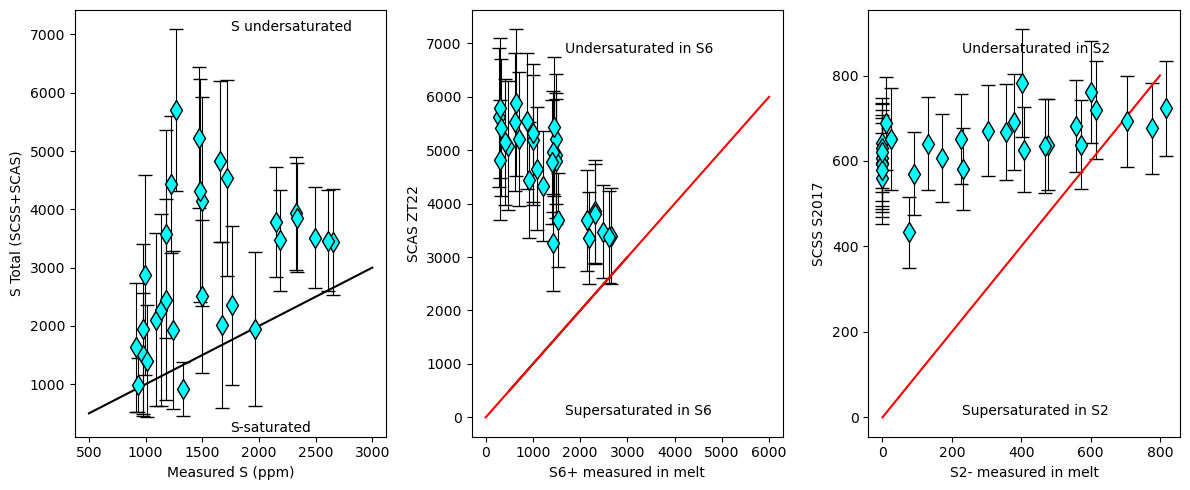

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))

ax1.errorbar(S_types['S_ppm'],
         Stats_St['Mean_calc'], xerr=0, yerr=Stats_St['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
ax1.plot([500, 3000], [500, 3000], '-k')
ax2.plot([500, 3000], [500, 3000], '-k')
ax1.set_xlabel('Measured S (ppm)')
ax1.set_ylabel('S Total (SCSS+SCAS)')


  
    
ax2.errorbar((df_out['S6+/∑S'])*S_types['S_ppm'],
         Stats_S6['Mean_calc'], xerr=0, yerr=Stats_S6['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
        

ax2.plot([0, 6000], [0, 6000], '-r')
ax2.set_xlabel('S6+ measured in melt')
ax2.set_ylabel('SCAS ZT22')

ax3.errorbar((1-(df_out['S6+/∑S']))*S_types['S_ppm'],
         Stats_S2['Mean_calc'], xerr=0, yerr=Stats_S2['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
 

ax3.plot([0, 800], [0, 800], '-r')
ax3.set_xlabel('S2- measured in melt')
ax3.set_ylabel('SCSS S2017')
ax1.annotate("S-saturated", xy=(0.5, 0.01), xycoords="axes fraction", fontsize=10)
ax1.annotate("S undersaturated", xy=(0.5, 0.95), xycoords="axes fraction", fontsize=10)


ax2.annotate("Supersaturated in S6", xy=(0.3, 0.05), xycoords="axes fraction", fontsize=10)
ax2.annotate("Undersaturated in S6", xy=(0.3, 0.9), xycoords="axes fraction", fontsize=10)

ax3.annotate("Supersaturated in S2", xy=(0.3, 0.05), xycoords="axes fraction", fontsize=10)
ax3.annotate("Undersaturated in S2", xy=(0.3, 0.9), xycoords="axes fraction", fontsize=10)

fig.tight_layout()